In [195]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pd.options.display.float_format = "{:.1f}".format
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight") 

    First look at the DATA 

In [196]:
data = pd.read_csv('House_Rent_Dataset.csv')
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [197]:
def EDA(data):

    shape_info = data.shape

    print('EXPLORATORY DATA ANALYSIS:\n')

    print(f'NUMBER OF ROWS: {shape_info[0]} \nNUMBER OF COLUMNS:  {shape_info[1]}\n',
    '\n------------------------------------------------------------------------------------\n')

    print(f'COLUMN NAMES :\n\n {data.columns}\n',
    '\n------------------------------------------------------------------------------------\n')

    print(f'DATATYPES AND MISSING VALUES:\n')
    print(data.info(),
    '\n------------------------------------------------------------------------------------\n')

    print('SUMMARY STATISTICS FOR THE NUMERICAL DATA :\n')
    print(data.describe(),
    '\n------------------------------------------------------------------------------------\n')

    print('MISSING VALUES :\n')
    print(data.isnull().sum(),
    '\n------------------------------------------------------------------------------------\n')
    
EDA(data)

EXPLORATORY DATA ANALYSIS:

NUMBER OF ROWS: 4746 
NUMBER OF COLUMNS:  12
 
------------------------------------------------------------------------------------

COLUMN NAMES :

 Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')
 
------------------------------------------------------------------------------------

DATATYPES AND MISSING VALUES:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality  

    Exploratory Data Analys

In [198]:

def Column_info(data, name):
    print(f"Mean {name}:", round(data[name].mean()))

    print(f"Median {name}:", round(data[name].median()))

    print(f"Highest {name}:", round(data[name].max()))

    print(f"Lowest {name}:", round(data[name].min()))

    print(f"Std {name}:", round(data[name].std()))


Column_info(data, 'Rent')

Mean Rent: 34993
Median Rent: 16000
Highest Rent: 3500000
Lowest Rent: 1200
Std Rent: 78106


Data Correlation

In [199]:
corr_matrix = data.corr()
corr_matrix['Rent'].sort_values(ascending=False)

Rent       1.0
Bathroom   0.4
Size       0.4
BHK        0.4
Name: Rent, dtype: float64

In [200]:
heat_map_fig = px.imshow(corr_matrix, template="seaborn")

heat_map_fig.update_layout(xaxis_rangeslider_visible=False, 
                      autosize=False, 
                      width=500, 
                      height=500,
                      title={
                            'text': "Corellation of Numerical Variables"}
                    )


heat_map_fig.show()

In [201]:
def create_bar_plot(data, column_name):
    
    sns.set_context("poster", font_scale = .8)
    plt.figure(figsize = (14, 6))
    plt.title(f'Data amount for {column_name} column')
    ax = data[column_name].value_counts().plot(kind = 'bar', color = "#2AB1F5", rot = 0)

    for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 300),
                    ha = 'center',
                    va = 'bottom',
                    color = 'White')

def create_pie_plot(data, column_name):
    
    plt.figure(figsize=(16,8))
    plt.title(f'Percentage of data for {column_name} column')
    counts = data[column_name].value_counts()
    counts.plot(kind = 'pie',
                autopct = '%1.1f%%')
            
    plt.axis('equal')
    plt.legend(labels = counts.index, loc = "best")
    plt.show()

def column_name_to_price(data, column_name):

    plt.figure(figsize=(14,6))
    plt.title(f'The impact of {column_name} column on the rent price')
    fig = sns.lineplot(x=data[column_name], y=data['Rent'])


Understanding how rental prices vary by city

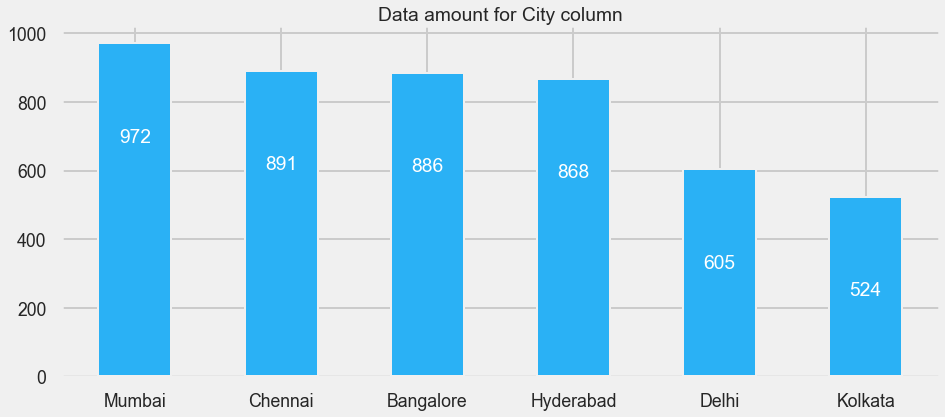

In [202]:
create_bar_plot(data, 'City')

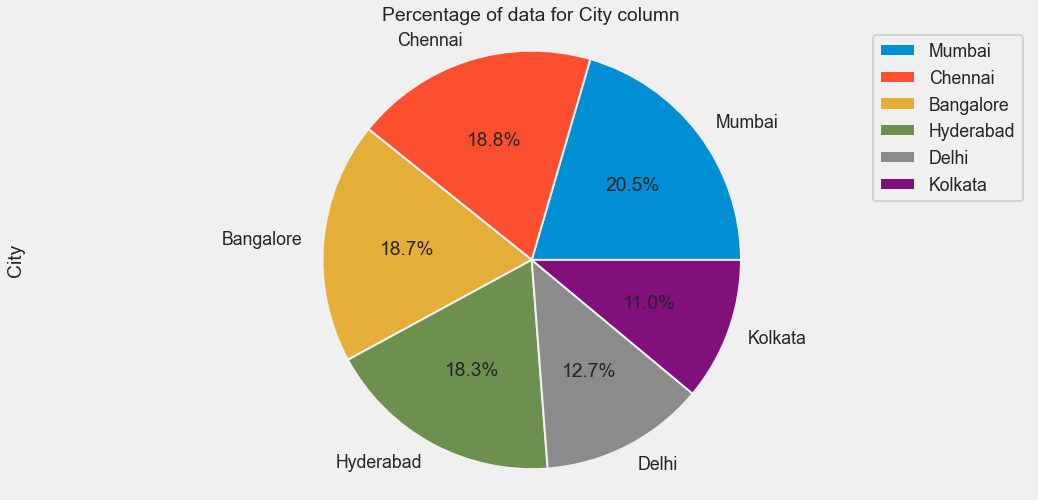

In [203]:
create_pie_plot(data, 'City')

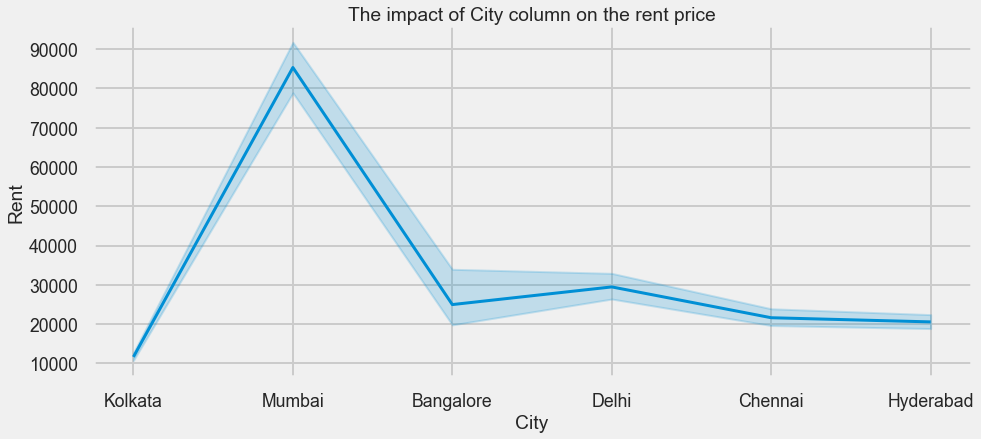

In [204]:
column_name_to_price(data, 'City')

    Conclussion about Rent price and City:

1) Mumbai is the most popular city for rental housing. Therefore, the cost of rent is higher than in other cities.

2) Kolkata and Delhi aren't popular for rental housing.

Understanding how rental prices vary by Furnishing Status

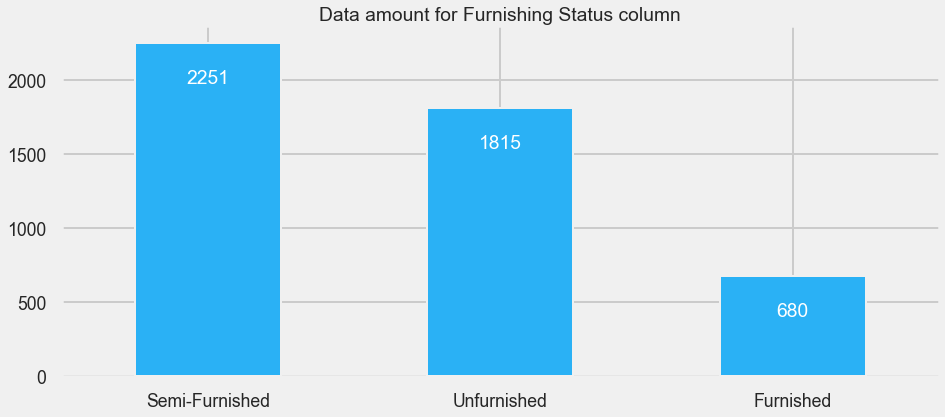

In [205]:
create_bar_plot(data, 'Furnishing Status')

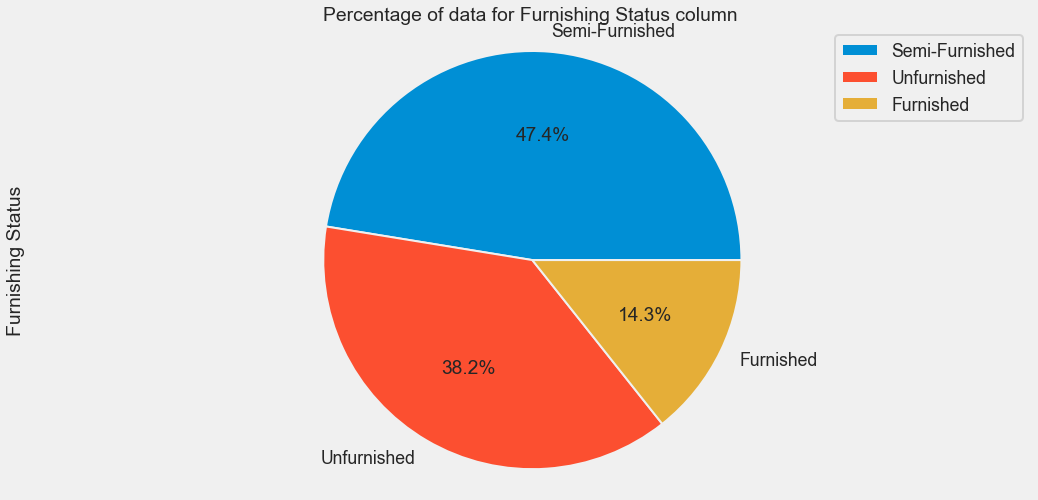

In [206]:
create_pie_plot(data, 'Furnishing Status')

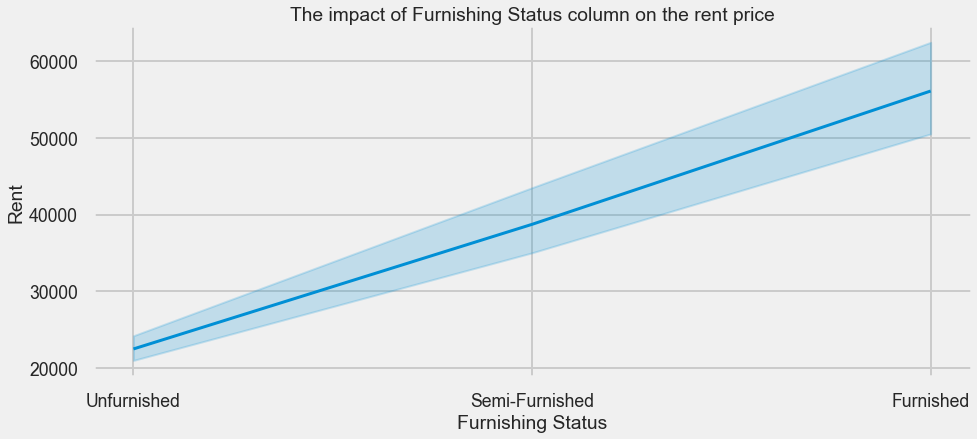

In [207]:
column_name_to_price(data, 'Furnishing Status')

    Conclussion about Rent price and Furnishing Status:

If the house is semi-furnished and furnished, then the price goes up.

Understanding how rental prices vary by Tenant Preferred

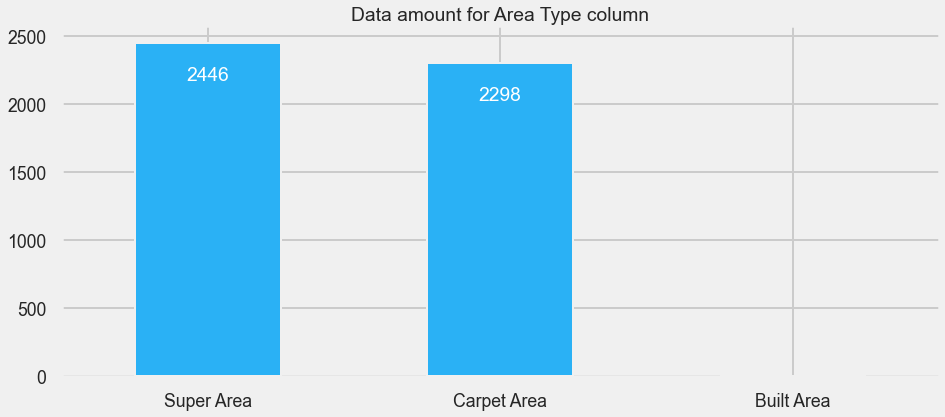

In [208]:
create_bar_plot(data, 'Area Type')

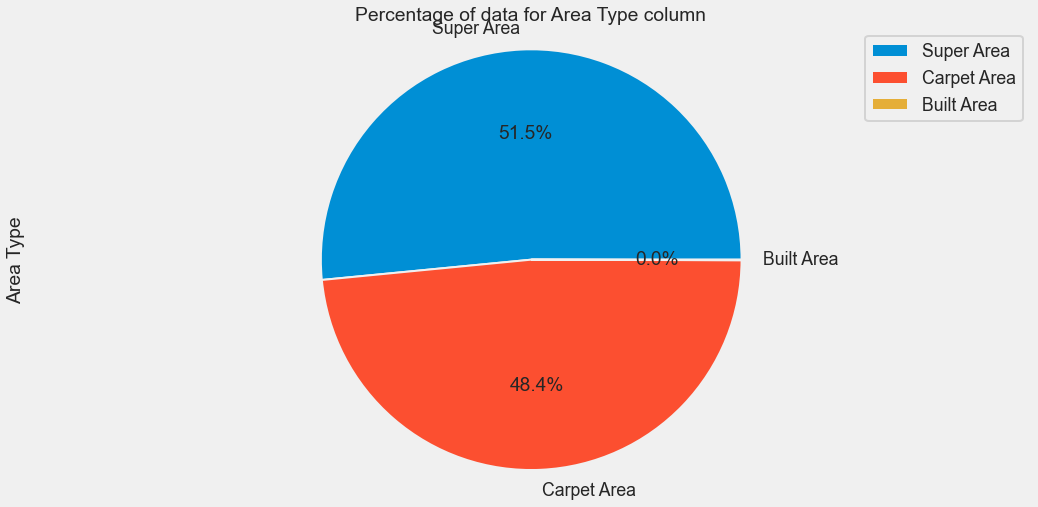

In [209]:
create_pie_plot(data, 'Area Type')

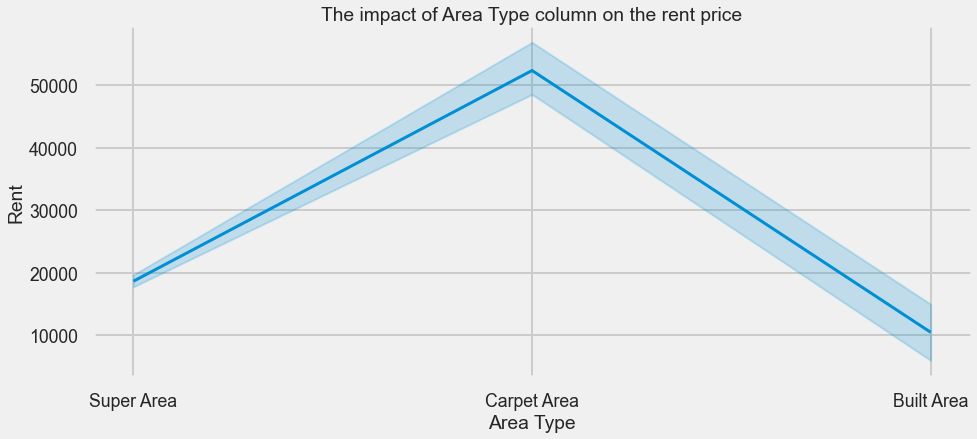

In [210]:
column_name_to_price(data, 'Area Type')

    Conclussion about Rent price and Area Type:

1) Size of the Houses calculated on Super Area or Carpet Area. 
2) Price is more varied by Carpet Area.

What is the difference between renting through an owner and a contact agent?

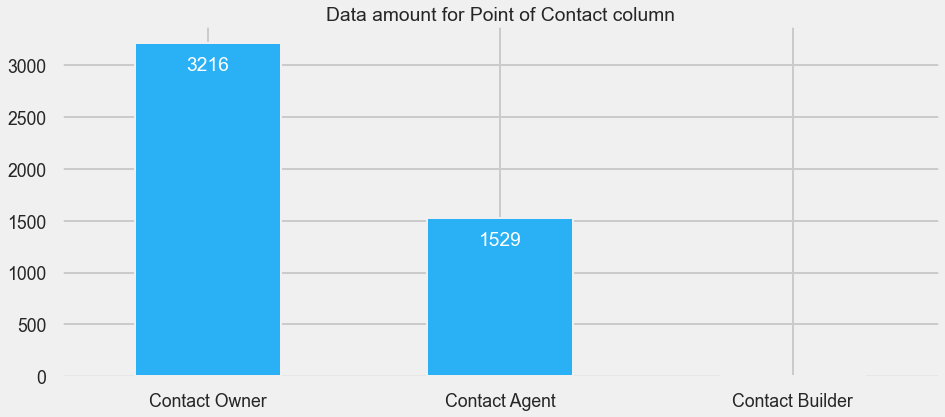

In [211]:
create_bar_plot(data, 'Point of Contact')

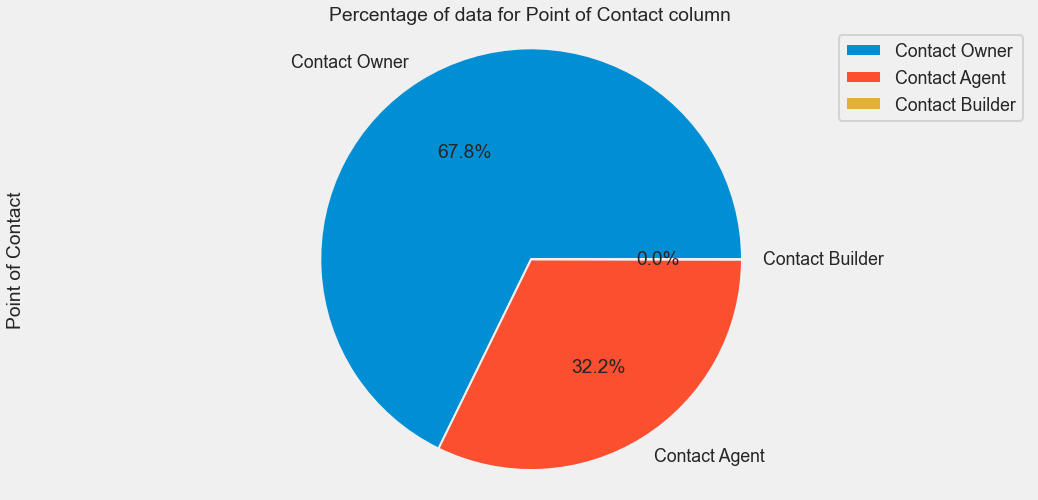

In [212]:
create_pie_plot(data, 'Point of Contact')

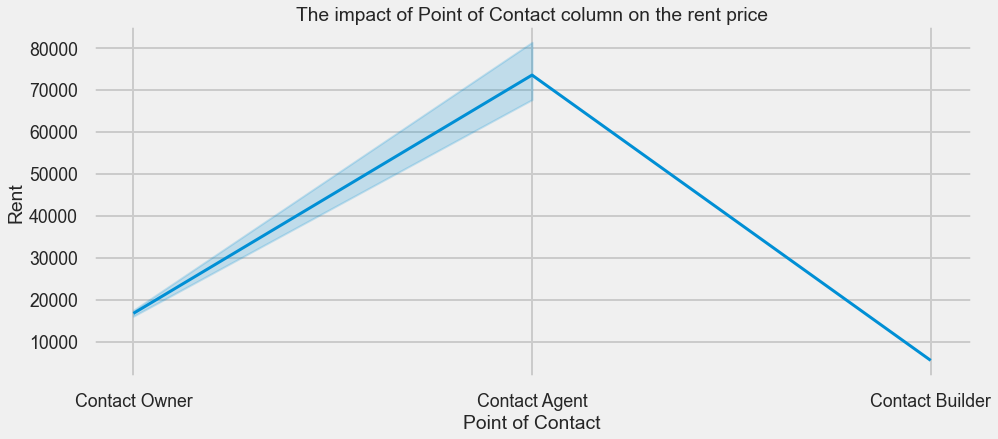

In [213]:
column_name_to_price(data, 'Point of Contact')

Conclussion:

If you use a Contact Agent the rent is more expensive than renting through a direct Contact Owner.

      Data pre processing and Model selection

Removing Useless Columns

In [214]:
y = data['Rent']
house_features = data.drop(['Rent', 'Posted On', 'Floor', 'Area Locality'], axis=1)

In [215]:
num_cols = list(house_features.select_dtypes('int64'))
print('Numerical Cols: ', num_cols,'\n')

cat_cols = list(house_features.select_dtypes('object'))
print('Object Cols:', cat_cols)

Numerical Cols:  ['BHK', 'Size', 'Bathroom'] 

Object Cols: ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']


Dealing with categorical features

In [216]:
from sklearn.preprocessing import OrdinalEncoder

OE_house_features = house_features.copy()

ordinal = OrdinalEncoder()
OE_house_features[cat_cols] = ordinal.fit_transform(OE_house_features[cat_cols])

In [217]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

numerical_transformer = SimpleImputer(strategy='constant')

categorical_transformer = Pipeline(steps=[
    ('ordinal_encoder', OrdinalEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

In [218]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(house_features, y, test_size=0.15, random_state=21)

In [219]:
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

models = {
    'RandomForestRegressor' :RandomForestRegressor(),
    'BayesianRidge' :BayesianRidge(),
    'SGDRegressor' :SGDRegressor(),
    'ElasticNet' :ElasticNet(),
    'Ridge' :Ridge(), 
    'XGBRegressor' :XGBRegressor(),
    'SVR' :SVR()
}

model_results = []
model_names = []

for name, model in models.items():

    pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)])

    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    score = mean_absolute_error(y_test, predictions)
    model_results.append(score)
    model_names.append(name)

results = pd.DataFrame([model_names,model_results])
results = results.transpose()
results = results.rename(columns={0:'Model',1:'MAE'}).sort_values(by='MAE',ascending=False)

In [220]:
results

,Model,MAE
2,SGDRegressor,97870585309409.9
4,Ridge,24474.8
1,BayesianRidge,24407.0
6,SVR,24067.0
3,ElasticNet,24049.3
0,RandomForestRegressor,12118.6
5,XGBRegressor,11981.8


    Working with the best models XGBRegressor and RandomForestRegressor

RandomForestRegressor

In [221]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [75, 100, 125, 150 ,200],
    'max_depth': [6, 8, 12, 16, 22, 36, 50]
}

X_train, X_test, y_train, y_test = train_test_split(OE_house_features, y, test_size=0.15, random_state=21)

rf_model = RandomForestRegressor()

gs = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=5, verbose=True)
gs.fit(X_train, y_train)

print("Best Params:", gs.best_params_)
print('Best Score:', gs.best_score_)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best Params: {'max_depth': 12, 'n_estimators': 75}
Best Score: 0.405844350965965


In [222]:
from sklearn.metrics import r2_score

rf_model = RandomForestRegressor(n_estimators=100, max_depth=12, random_state=0)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(r2_score(y_test, preds))

0.6948124561076394


XGBRegressor

In [223]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [6, 8, 10, 12, 75],
    'max_depth': [3, 6, 8, 12, 16, 22, 36, 50]
}

X_train, X_test, y_train, y_test = train_test_split(OE_house_features, y, test_size=0.15, random_state=21)

xgb = XGBRegressor()

gs = GridSearchCV(xgb, param_grid, cv=5, scoring='r2')
gs.fit(X_train, y_train)

print("Best Params:", gs.best_params_)
print('Best Score:', gs.best_score_)

Best Params: {'max_depth': 3, 'n_estimators': 6}
Best Score: 0.5332842631637342


In [224]:
xgb_model = XGBRegressor(n_estimators=6, max_depth=3)
xgb_model.fit(X_train, y_train)
preds = xgb_model.predict(X_test)
print(r2_score(y_test, preds))

0.7171309675611952


Conclussion:

The best way to predict Rent house price is to use XGBRegressor.

In [243]:
xgb_model = XGBRegressor(n_estimators=10, max_depth=6)
xgb_model.fit(X_train, y_train)
final_preds = xgb_model.predict(X_test)


model_results = pd.DataFrame([y_test.values, final_preds])
model_results = model_results.transpose()
model_results = model_results.rename(columns={0:'Rent Price',1:'Predicted Rent Price'})

print(model_results.describe(),'\n')
print("MAE for Predicted", round(mean_absolute_error(model_results['Rent Price'], model_results['Predicted Rent Price']), 1),'\n')
print("r2_score for Predicted", round(r2_score(model_results['Rent Price'], model_results['Predicted Rent Price']), 2))



       Rent Price  Predicted Rent Price
count       712.0                 712.0
mean      34084.7               32201.7
std       59791.6               48179.6
min        1200.0                5811.5
25%       10000.0               11398.4
50%       15750.0               16065.0
75%       32000.0               31146.4
max      680000.0              526398.2 

MAE for Predicted 10962.8 

r2_score for Predicted 0.76


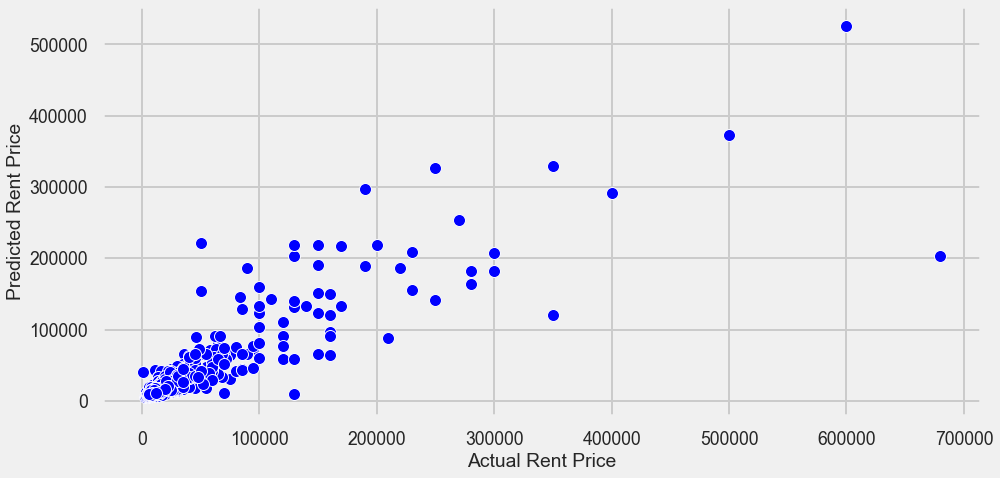

In [245]:
from scipy.special import inv_boxcox

plt.figure(figsize= (14, 7))
sns.scatterplot(x= model_results['Rent Price'], y= model_results['Predicted Rent Price'], color= 'blue')
plt.xlabel('Actual Rent Price')
plt.ylabel('Predicted Rent Price')
plt.show()